In [70]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\data-with-selected-features.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/data-with-selected-features.csv')


In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [72]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Citric acid \n(g)', 'Malic acid\n (g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Molybdenum (Mo) \n(ug)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Sulphur (S) \n(mg)', 'Zinc (Zn) \n(mg)', 'Retinol (preformed vitamin A) \n(ug)', 'Beta-carotene \n(ug)', 'Cryptoxanthin \n(ug)', 'Beta-carotene equivalents (provitamin A) \n(ug)', 'Vitamin A retinol equivalents \n(ug)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \

In [73]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
1339                                             76                    94.6  \
1287                                            324                    78.0   
830                                             632                    66.4   
604                                             236                    84.2   
196                                             832                    45.0   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
1339            0.7            0.12               0.2        1.1  \
1287           16.6            2.65               1.2        1.8   
830            27.5            4.40               4.4        1.3   
604             0.4            0.06               0.1        0.2   
196             5.6            0.90               0.8        2.1   

      Total dietary fibre \n(g)  Fructose \n(g)  Glucose \n(g)  Sucrose\n(g)   
1339                       

# Linear Regression

In [74]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
train, test = train_test_split(data, test_size=0.2)

# sample some rows of training set
X_train.sample(10)

,"Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Fructose \n(g),Glucose \n(g),Sucrose\n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
773,465,73.7,22.2,3.56,2.4,1.2,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,NaN
1556,115,88.8,0.8,0.12,0.1,0.6,1.9,1.2,3.9,0.0,...,49.0,37.0,13.0,30.0,13.0,36.0,28.0,28.0,9,36.0
580,967,21.3,3.6,0.58,0.7,2.1,14.3,27.2,25.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN
769,815,65.7,18.9,3.02,13.3,1.1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,NaN
183,1007,38.5,7.8,1.36,2.8,1.8,3.6,0.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,NaN
986,658,64.8,24.8,3.96,6.4,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289,NaN
395,230,85.5,0.8,0.13,2.9,2.2,1.3,0.9,1.1,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
1338,1502,4.9,10.8,1.82,6.3,14.2,2.2,0.0,0.7,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,NaN
1508,111,90.3,1.7,0.27,0.1,0.6,2.1,1.4,2.1,1.2,...,58.0,83.0,13.0,65.0,29.0,49.0,40.0,33.0,25,40.0
440,1108,58.8,1.0,0.16,21.8,0.2,0.0,0.0,3.8,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [76]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
X_train.head()
y_train.head()

X_COLS: ['Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Citric acid \n(g)', 'Malic acid\n (g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Molybdenum (Mo) \n(ug)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Sulphur (S) \n(mg)', 'Zinc (Zn) \n(mg)', 'Retinol (preformed vitamin A) \n(ug)', 'Beta-carotene \n(ug)', 'Cryptoxanthin \n(ug)', 'Beta-carotene equivalents (provitamin A) \n(ug)', 'Vitamin A retinol equivalents \n(ug)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalent

1518    81.8
1439    86.0
364     34.1
1148    36.5
480     94.5
Name: Moisture (water) \n(g), dtype: float64

In [77]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

lm.fit(X_train, y_train)

LinearRegression()

In [82]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# compare manually predicted labels with the true labels
print(f"Predictions: {y_pred[:10].round(1)}")
print(f"True labels: {y_test[:10].values}")

Intercept: 97.75171668120595
Coefficients: [-4.80065785e-01 -2.76141659e+00 -1.11959466e+00  3.81198947e-01
 -9.86244807e-01 -6.76344966e-02  8.24121001e-03 -3.63617603e-02
  2.68699386e-03  2.11251997e-01 -2.15298357e-01 -4.51012043e-02
  2.18260530e-01 -1.16949459e+00 -5.79915778e-01 -3.93111386e-01
 -3.75305646e-03  8.45658935e-02  2.22386888e-03 -2.49441382e-02
 -1.19156197e-02  8.55005251e-02 -1.85296686e-02  2.23375030e-04
 -3.19877374e-03  2.54027246e-04 -3.79574746e-03 -1.20664232e-04
  3.67134643e-03 -1.50397098e-01 -1.97646996e-04 -4.13497419e-04
 -2.47205678e-02  1.50138860e-01 -1.98334185e-01  1.98792561e-01
  2.27086776e-01 -9.09048412e+00 -2.83721015e-01  8.57354953e-01
  9.14279853e-01 -7.12026542e-02  1.85413378e-02  7.14490489e-02
 -1.85852465e-01  1.14401835e-01  7.53072064e-03  1.34908772e-01
 -2.67091345e-02  4.94614562e-02 -4.35929797e-03 -9.26708353e-04
  1.92205155e-01 -2.72169538e-02  2.60835585e-01  3.44820606e-02
 -2.45159921e-01 -4.23641766e-02  1.36295180e-0

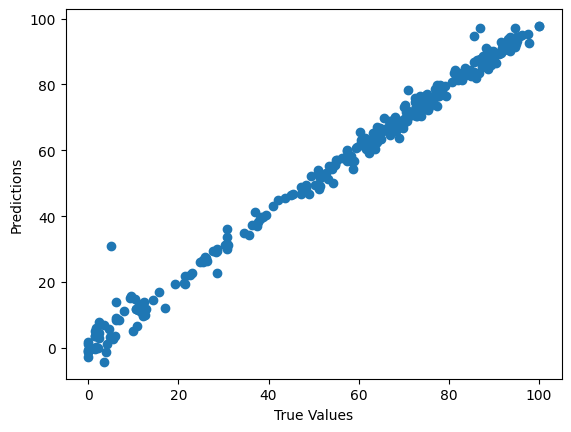

In [79]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

A low MSE value indicates that the model is a good fit for the data. In this case, the MSE is considered low as can be seen from the plot above.